# 7 Newton's Method

In this section we shall assume $f$ is twice continuously differentiable and convex. Intuitively, for a small step attempt $d_k$ we have 
$$f(x_k+d_k)\approx f(x_k) + \nabla f(x_k)^Td_k + \frac 12 d_k^T \nabla^2 f(x_k)d_k.$$
The right hand side is a quadratic form of  $p_k$ with minimizer  
at zero derivative 
$$\nabla^2 f(x_k)d_k + \nabla f(x_k)=0\quad \Leftrightarrow \quad d_k = - \nabla^2f(x_k)^{-1} \nabla f(x_k).$$
The step size $d(x_k) = d_k = - \nabla^2f(x_k)^{-1} \nabla f(x_k)$ is called the Newton step or Newton direction. 

### Affine Invariance
Newton method is invariant under affine transformation on the function.

### Newton's Decrement
Define $\lambda(x) = \Vert \nabla f(x_k)^Td(x_k)\Vert^\frac 12$. Then $\frac 12\lambda ^2$ is the upper bound of decrement in the step, i.e.
$$\begin{aligned}f(x_k+d_k)- f(x_k)&\geqslant  \nabla f(x_k)^Td_k + \frac 12 d_k^T \nabla^2 f(x_k)d_k\\ &
=\frac 12\left(\nabla ^2f(x_k)^{-1}\nabla f(x_k)- d_k\right)
\nabla^2 f(x_k)\left(\nabla ^2f(x_k)^{-1}\nabla f(x_k)- d_k\right)\\ 
&\quad\quad - \frac 12\nabla f(x_k)^T\nabla ^2 f(x_k)^{-1}\nabla f(x_k)\\ 
&\geqslant -\frac 12\lambda^2\end{aligned}.$$

## Damped Newton's Method

Plug the Armoji line search into Newton's method, we determine $\alpha\in (0,\frac 12),\beta\in (0,1]$ in the beginning and in each step we  take 
$t_k = \beta^{r_k}\ (r_k\in \mathbb N)$ such that $x_{k+1} = x_k +t_kd_k$ has the property that 
$$f(x_{k+1}) - f(x_k)\leqslant -\alpha |\nabla f(x_k)^T(x_{k+1} - x_k)| =\alpha t_k \nabla f(x_k)^T d_k.$$


### Convergence Rate

To analyze the convergence rate of the damped Newton's method, we further assume that $f$ is strongly convex where $\nabla ^2 f(x)^T\succ mI\ (m>0)$ and $\nabla f$ is Lipschitz continuous by $\Vert \nabla f(x) - \nabla f(y)\Vert \leqslant L\Vert x-y\Vert$ so that $mI\prec \nabla ^2 f(x) \preceq LI$. Also we require that $\Vert \nabla^2 f(x) - \nabla^2 f(y)\Vert \leqslant L_2\Vert x-y\Vert$.

Then there exists some $y,r$ such that $0<y<\frac {m^2}{L}$ and $r>0$ and 
* Global convergence: if $\Vert \nabla f(x_k)\Vert >y$, then $f(x_{k+1}) - f(x_k) \leqslant -r$. 
* Local quadratic convergence: if $\Vert \nabla f(x_k)\Vert \leqslant y$, we have $t_k = 1$ and $\frac{ L_2}{2m^2}\Vert \nabla f(x_{k+1})\Vert \leqslant \left(\frac{ L_2}{2m^2}\Vert \nabla f(x_k)\Vert \right)^2$.

Proof: First we plug in $x_{k+1} - x_k = t_kd_k$ and $d_k = -\nabla^2 f(x_k)^{-1}\nabla f(x_k)$, and then we have 
$$\begin{aligned}f(x_{k}+t_k d_k) - f(x_k)&\leqslant t_k \nabla f(x_k)^T d_k + \frac L2 t_k^2 d_k^T d_k\end{aligned}$$
and 
$$f(x_{k}+t_k d_k) - f(x_k)-\alpha t_k\nabla f(x_k)^T d_k\leqslant 
 (1-\alpha )t_k \nabla f(x_k)^T d_k + \frac L2 t_k^2 d_k^T d_k .$$
Thus, when $0\leqslant t_k \leqslant \frac{-(1-\alpha ) \nabla f(x_k)^T d_k }{\frac L2  d_k^T d_k }$, we have $f(x_{k}+t_k d_k) - f(x_k)-\alpha t_k\nabla f(x_k)^T d_k \leqslant 0$. Now we note that all the eigenvalues of 
$(\nabla^2)^{-1}- m(\nabla ^2)^{-2}$ are nonnegative, we learn 
$$\nabla f(x_k)^T\nabla^2f(x_k)^{-1}\nabla f(x_k) \geqslant m \nabla f(x_k)^T\nabla^2f(x_k)^{-2}\nabla f(x_k)
\quad\Rightarrow\quad -\nabla f(x_k)^T d_k \geqslant m  d_k^Td_k.$$
So, 
$$\frac{(1-\alpha )\cdot (- \nabla f(x_k)^T d_k) }{\frac L2  d_k^T d_k }\geqslant \frac{m(1-\alpha)}{\frac L2}
\geqslant \frac{\frac m2}{\frac L2}= \frac mL.$$

Therefore, any $t_k\leqslant \frac mL$ must be a valid step. So the damped Newton's method in each iteration would return a step size no smaller than $\beta \frac{m}{L}$ by interrupted line search. Hence
$$ \begin{aligned}f(x_{k}+t_k d_k) - f(x_k) &\leqslant -\alpha t_k \cdot (- \nabla f(x_k)^Td_k) 
= -\alpha t_k \nabla f(x_k)^T\nabla^2 f(x_k)^{-1}\nabla f(x_k)\\ &
\leqslant - \frac{\alpha t_k}{L} \nabla f(x_k)^T \nabla f(x_k)
 \leqslant - \frac{\alpha \beta m}{L^2} \nabla f(x_k)^T \nabla f(x_k)\\ &\leqslant - \frac{\alpha \beta m}{L^2}y^2
\quad\quad (\Vert \nabla f(x_k)\Vert \geqslant y)\end{aligned} $$

Moreover, we have the $3$ rd order Taylor expansion that 
$$
\begin{aligned}f(x_k + t_kd_k) - f(x_k)&\leqslant \nabla f(x_k)^Td_k +\frac 12 d_k^T\nabla ^2 f(x_k)d_k + \frac {L_2}{6} \Vert d_k\Vert^3\\ &\leqslant \frac12  \nabla f(x_k)^Td_k   + \frac {L_2}{6} (\frac 1m (-\nabla f(x_k)^Td_k) )^\frac 32
\end{aligned} $$
When $- \nabla f(x_k)^Td_k <m\left(\frac{3(1 - 2\alpha)}{L}\right)^2$, we further deduce  
$$f(x_k + t_kd_k) - f(x_k)\leqslant \alpha \nabla f(x_k)^Td_k\quad\Rightarrow\quad t_k = 1.$$
So, as long as $\Vert \nabla f(x_k)\Vert$ is small enough, it will 
lead to $- \nabla f(x_k)^Td_k <m\left(\frac{3(1 - 2\alpha)}{L}\right)^2$ and thus $t_k = 1$.  In this case, 
$$\begin{aligned}\Vert \nabla f(x_k+d_k)\Vert &
 = \left\Vert \nabla f(x_k+d_k) - \nabla f(x_k) -\nabla ^2 f(x_k) d_k\right\Vert \\ 
 &= \left\Vert \int_0^1 \left( \nabla^2 f(x_k + ud_k) -  \nabla^2 f(x_k)\right)d_kdu\right\Vert\\ 
 &\leqslant \int_0^1 \left\Vert \nabla^2 f(x_k + ud_k) -  \nabla^2 f(x_k)\right\Vert\left\Vert d_k\right\Vert du\\ 
  &\leqslant  L_2 \int_0^1 u \left\Vert d_k\right\Vert^2 du\\ &
   \leqslant \frac{ L_2}{2} \cdot \frac{1}{m^2}\left\Vert \nabla f(x_k)\right\Vert^2 .
 \end{aligned}$$

## Inexact Newton's Method

There are cases when we solve the  linear system $\nabla^2 f(x_k) d_k =- \nabla f(x_k)$ by 
**iterative method** like CG (conjugate gradient) to reduce time consumption. And suppose that there are residuals between the exact solution and our 
$d_k$, i.e.
$$r_k = \nabla^2 f(x_k)d_k + \nabla f(x_k),$$
the Newton's method still performs well as long as $r_k$ is sufficiently small. This is called inexact Newton's Method. The convergence rate is characterized as follows. 

<br>

Before we start, we assume that $f$ is twice continuously differentiable and $\nabla^2 f(x)\succ 0$, and 
$\Vert r_k\Vert \leqslant \eta_k\Vert \nabla f(x_k)\Vert$. 

### Linearity

If $\eta_k \in [0,t)$ is bounded and $t<1$. Then it has local linear convergence.

Proof: Since  $\nabla^2 f(x)\succ 0$, $\Vert \nabla^2 f(x)\Vert $ is positive on a closed area and has nonzero infimum $L$. Then 
$$\Vert d_k\Vert = \Vert \nabla^2f(x_k)^{-1}(r_k - \nabla f(x_k) )\Vert
\leqslant \Vert \nabla^2 f(x_k)^{-1}\Vert \cdot \Vert r_k - \nabla f(x_k)\Vert \leqslant
\frac 1L(1+\eta_k)\Vert \nabla f(x_k)\Vert$$
is bounded locally.
 
Also,
$$\begin{aligned}\Vert \nabla f(x_{k+1})\Vert &
\leqslant \Vert \nabla f(x_k) + \int_0^1 \nabla ^2 f(x_k + td_k)d_kdt\Vert\\&
= \Vert \nabla f(x_k) + \nabla^2f(x_k)d_k+ \int_0^1 (\nabla ^2 f(x_k + td_k) - \nabla^2 f(x_k))d_kdt\Vert  \\ 
&\leqslant \Vert\nabla f(x_k) +  \nabla^2f(x_k)d_k\Vert + o(\Vert d_k\Vert)\\
&= \Vert r_k \Vert + o(\Vert d_k\Vert).
\end{aligned}
$$
Thus, as long as $\Vert d_k\Vert$ is small enough to be omitted,
$$\Vert \nabla f(x_{k+1})\Vert  \leqslant  \Vert r_k\Vert +\Vert o(\Vert d_k\Vert)\Vert \leqslant \frac{1+\eta_k}{2}\Vert \nabla f(x_k)\Vert<\frac{1+t}{2}\Vert \nabla f(x_k)\Vert
. $$ 


### Superlinearity

If $\lim \eta_k= 0$, then it has local superlinear convergence.

Proof: Because
$$\frac{\Vert \nabla f(x_{k+1})\Vert}{\Vert \nabla f(x_{k})\Vert}\leqslant 
\frac{  \Vert r_k\Vert +\Vert o(\Vert d_k\Vert)\Vert}{\Vert \nabla f(x_{k})\Vert}\rightarrow 0.$$

### Quadratic Convergence

If $\nabla^2f(x_k)$ is Lipschitz continuous around $x_*$ and $\eta_k = O(\Vert \nabla f(x_k)\Vert)$, then it has local quadratic convergence.

Proof: Modify the proof above by 
$$\begin{aligned}\Vert \nabla f(x_{k+1})\Vert &
\leqslant \Vert \nabla f(x_k) + \int_0^1 \nabla ^2 f(x_k + td_k)d_kdt\Vert\\&
= \Vert \nabla f(x_k) + \nabla^2f(x_k)d_k+ \int_0^1 (\nabla ^2 f(x_k + td_k) - \nabla^2 f(x_k))d_kdt\Vert  \\ 
&\leqslant \Vert\nabla f(x_k) +  \nabla^2f(x_k)d_k\Vert + O(\Vert d_k\Vert^2)\\
&=\Vert r_k \Vert + O(\Vert d_k\Vert^2)\\
&\leqslant \eta_k \Vert \nabla f(x_k)\Vert +  + O(\Vert d_k\Vert^2)\\ &= O(\Vert \nabla f(x_k)\Vert^2).
\end{aligned}
$$

## Quasi-Newton's Method

There are also cases when the Hessian is difficult to compute, and we turn to approximate the Hessian by 
alternative methods. This is called the quasi-Newton's method.

Suppose we approximate $\nabla^2 f(x_k)$ by $B_k$ in the $k$-th step, then we choose $p_k = -B_k^{-1}p_k$ and update 
$x_{k+1} = x_k +t_kp_k$. 

Assume $B_{k+1}$ is obtained by slightly updating $B_k$ after having solved $x_{k+1}$ at the $k$-th step. It should have the property that it imitates the Hessian, 
$$B_{k+1}(x_{k+1} - x_k) = \nabla f(x_{k+1}) - \nabla f(x_k).$$

For simplification, we write $s_k = x_{k+1} - x_k$ and $y_k =  \nabla f(x_{k+1}) - \nabla f(x_k)$, and then 
$B_{k+1}s_k = y_k$. If we add the constraint that $B_{k+1} - B_k$ is small (with respect to some norm), it leads to the DFP.

### DFP

A good choice of $B_{k+1}$ is solved by 
$$\min\{\Vert B - B_k\Vert_{F,W}:\quad B = B^T\quad Bs_k = y_k\},$$
where $W = \left(\int_0^1 \nabla ^2f(x_k + \tau t_k x_k)d\tau\right)^{-1}$ is the inverse of the average of Hessian, $  Wy_k =s_k$ and  the norm $\Vert X\Vert_{F,W}$ stands for $\Vert W^\frac 12 XW^\frac 12\Vert_F$.

Then,
$$B_{k+1}  = \left(I -\frac{y_ks_k^T}{y_k^Ts_k}\right)B_k\left(I -\frac{s_ky_k^T}{y_k^Ts_k}\right)+\frac{y_k y_k^T}{y_k^Ts_k}$$
and its inverse can be updated by Sherman-Morrison-Windbury formula,
$$B_{k+1}^{-1} = B_k^{-1} - \frac{B_k^{-1}y_ky_k^TB_k^{-1}}{y_k^TB_k^{-1}y_k}+\frac{s_ks_k^T}{y_k^Ts_k}.$$

(The updating formula does not require the computation of $W$.)

<br>

Proof: Denote $\hat B = W^\frac 12 BW^\frac 12$ and   $\hat B_k = W^\frac 12 B_kW^\frac 12$, and the problem becomes minimizing $$\Vert B - B_k\Vert_{F,W}^2=\Vert W^\frac 12B W^\frac 12- W^\frac 12B_kW^\frac 12\Vert_{F}^2=\Vert \hat B - \hat B_k\Vert_F^2.$$
Now we let $ \hat s_k = W^{-\frac 12} s_k$. Then by $Bs_k = W^{-1}s_k$ we learn that 
$\hat B \hat s_k = \hat s_k$.
Let the standardlized orthogonal complement of $\hat s_k$ be $Q\in \mathbb R^{n\times (n-1)}$. Then $(\hat B- I)\hat s_k =0\Rightarrow B-I= QPQ^T $ where $P\in \mathbb R^{(n-1)\times (n-1)}$. Then, 
$$ \Vert \hat B - \hat B_k\Vert_F^2=\Vert QPQ^T +I- \hat B_k\Vert_F^2=\Vert QPQ^T  + A\Vert_F^2$$
where $A = I-\hat B_k$. 

Note that the we can rewrite  bilinear problem into an OLS (ordinary least square),
$$ \Vert {\rm vec}(QPQ^T+A)\Vert_F^2 =  \Vert
{\rm vec}(QPQ^T)+{\rm vec}(A)\Vert_F^2=\Vert
(Q\otimes Q){\rm vec}(P)+{\rm vec}(A)\Vert_F^2.
$$
So the minimizer $P$ has the property that 
$$(Q\otimes Q)^T(Q\otimes Q){\rm vec}(P) +(Q\otimes Q)^T {\rm vec}(A) = 0.$$
Observe that 
$$(Q\otimes Q)^T(Q\otimes Q)=(Q^T\otimes Q^T)(Q\otimes Q) = (Q^TQ\otimes Q^TQ) = I,$$
so
$$ {\rm vec}(P) =-(Q\otimes Q)^T  {\rm vec}(A)=-(Q^T\otimes Q^T)  {\rm vec}(A)=-{\rm vec}(Q^TAQ) $$
Plug in $A =I -\hat  B_k$ and $B = I+QPQ^T$, we have 
$$B = I - QQ^T(I -\hat  B_k)QQ^T = I - QQ^T + QQ^T\hat B_kQQ^T.$$
Lastly, we recall that $QQ^T + \frac{\hat s_k\hat s_k^T}{\Vert \hat s_k\Vert^2} = I$, it yields
$$\begin{aligned}B &= \frac{\hat s_k\hat s_k^T}{\Vert \hat s_k\Vert^2} +(I -\frac{\hat s_k\hat s_k^T}{\Vert \hat s_k\Vert^2})\hat  B_k(I -\frac{\hat s_k\hat s_k^T}{\Vert \hat s_k\Vert^2}) \\&
= \frac{\hat s_k\hat s_k^T}{\Vert \hat s_k\Vert^2} +(I -\frac{\hat s_k\hat s_k^T}{\Vert \hat s_k\Vert^2})W^\frac 12 B_kW^\frac 12(I -\frac{\hat s_k\hat s_k^T}{\Vert \hat s_k\Vert^2}) \\
&= \frac{y_k y_k^T}{y_k^Ts_k}+(I -\frac{y_ks_k^T}{y_k^Ts_k})B_k(I -\frac{s_ky_k^T}{y_k^Ts_k})\end{aligned} $$
Here we have use the fact that
$\Vert \hat s_k\Vert^2 = s_k^TW^{-\frac 12}W^{-\frac 12}s_k = y_k^Ts_k$ and  $\hat s_k\hat s_k^TW^{\frac 12} = W^{-\frac 12}s_k s_k^T =y_ks_k^T$.

In [143]:
import numpy as np
np.random.seed(0)
n = 5 
Bk = np.random.randn(n,n)
Bk = (Bk + Bk.T) * .5  
W = np.random.randn(n,n)
Wroot = W @ W.T 
W = Wroot @ Wroot
Q = np.linalg.qr(np.random.randn(n,n))[0]
Q , s = Q[:,:-1], Q[:,-1:]
y = np.linalg.solve(W, s) 
invW = np.linalg.inv(W)
f = lambda x: np.linalg.norm(Wroot @ (x - Bk)@ Wroot)

B = (np.eye(n) - y @ s.T / (y.T @ s)) @ Bk @ (np.eye(n) - s @ y.T / (y.T @ s)) + y @ y.T / (s.T @ y)
print(f(B))
print(B @ s - y)

62.41419904346273
[[ 1.80411242e-16]
 [ 5.55111512e-17]
 [-7.28583860e-17]
 [ 3.46944695e-18]
 [ 1.87350135e-16]]


In [156]:
import torch     
torch.manual_seed(314159)
Wroot_ = torch.tensor(Wroot,dtype=torch.float64) 
x = torch.randn((n,n),requires_grad = True,dtype=torch.float64) 
Bk_ = torch.tensor(Bk, dtype=torch.float64)
s_ = torch.tensor(s, dtype=torch.float64)
y_ = torch.tensor(y, dtype=torch.float64)
opt = torch.optim.Adam([x])
losses = []
from tqdm import tqdm 
for i in tqdm(range(15000)):
    z = (x + torch.transpose(x,1,0)) * .5
    l = torch.norm(Wroot_ @ (z - Bk_) @ Wroot_) * .002
    l +=  torch.norm(z @ s_ - y_)
    opt.zero_grad()
    l.backward()
    losses.append(l.item())
    opt.step()
z = (x + torch.transpose(x,1,0)) * .5
x2 = z.detach().numpy() 
x2

100%|██████████| 15000/15000 [00:19<00:00, 782.65it/s]


array([[ 0.75312404, -0.85536334, -0.57761351,  0.00325915, -1.1953545 ],
       [-0.85536334,  0.71285175, -0.28895747, -0.94136126,  0.51795151],
       [-0.57761351, -0.28895747, -1.49348758, -1.58969607, -0.36784199],
       [ 0.00325915, -0.94136126, -1.58969607, -0.61380877, -1.03107502],
       [-1.1953545 ,  0.51795151, -0.36784199, -1.03107502,  0.39440174]])

66.88024551187263
[[-3.49189956e-05]
 [ 1.45350404e-04]
 [-5.99087877e-05]
 [ 1.88689245e-04]
 [-3.62102133e-04]]


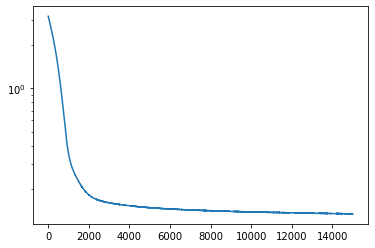

In [157]:
import matplotlib.pyplot as plt 
print(f(x2))
print(x2 @ s - y)
plt.semilogy(losses)


### Wolfe Condition

If there exists $0<c_1<c_2<1$ such that
$$\begin{aligned} f(x_k+t_kp_k)&\leqslant f(x_k) + c_1t_k \nabla f(x_k)^Tp_k
\\ \nabla f(x_k+t_kp_k)^Tp_k &\geqslant c_2\nabla f(x_k)^Tp_k,\end{aligned}$$
in the iteration strategy $x_{k+1} = x_k +t_kp_k$,
we call it satisfies the Wolfe condition.

The first inequality is the same as line search.

### Zoutendijk's Theorem

Suppose $p_k$ satisfies the Wolfe condition, $f$ is bounded below and $f$ has Lipschitz continuous gradient $\nabla f$ over the domain (a level set) $\{x:\ f(x)\leqslant f(x_0)\}$, i.e.
$$\Vert \nabla f(x) - \nabla f(y)\Vert \leqslant L\Vert x - y\Vert.$$
Then, 
$$\sum_{k=0}^\infty \cos^2\theta_k \Vert \nabla f(x_k)\Vert^2 \leqslant \frac{L}{c_1(1-c_2)}\left(f(0) - f_*\right) < + \infty$$
where $\cos\theta_k = -\frac{\nabla f(x_k)^Tp_k}{\Vert \nabla f(x_k)\Vert \Vert p_k\Vert}$.

Proof: Recall the Wolfe condition given by 

$$\begin{aligned} f(x_k+t_kp_k)&\leqslant f(x_k) + c_1t_k \nabla f(x_k)^Tp_k
\\ \nabla f(x_k+t_kp_k)^Tp_k &\geqslant c_2\nabla f(x_k)^Tp_k.\end{aligned}$$
On the one hand we derive $\left(\nabla f(x_k+t_kp_k)^T - \nabla f(x_k)^T\right)p_k\geqslant (c_2 - 1)\nabla f(x_k)^T p_k$. On the other by Lipschitz continuity we yied
$\left(\nabla f(x_k+t_kp_k)^T - \nabla f(x_k)^T\right)p_k\leqslant Lt_k\Vert p_k\Vert^2$. Hence we have that 
$$t_k \geqslant \frac{(1 - c_2)\cdot ( - \nabla f(x_k)^Tp_k)}{L \Vert p_k\Vert^2}$$
and thus 
$$f(x_{k+1}) - f(x_k)\leqslant - c_1t_k (  - \nabla f(x_k)^Tp_k) \leqslant 
-\frac{c_1(1 -c_2)\Vert f(x_k)^Tp_k\Vert^2}{L\Vert p_k\Vert^2}.$$
Sum it up to obtain 
$$f(x_*) - f(0)\leqslant \sum_{k=0}^\infty -\frac{c_1(1-c_2)}{L}\cdot \frac{(f(x_k)^Tp_k)^2}{\Vert p_k\Vert^2}
 = -\frac{c_1(1-c_2)}{L}\sum_{k=0}^\infty \cos^2\theta_k \Vert \nabla f(x_k)\Vert^2.$$

### BFGS

BFGS (Broyden, Fletcher, Goldfarb, Shanno) is a modification of DFP where we directly update on $B_k^{-1}$ rather $B_k$. It has superceded DFP by recent experience.
The choice of $B_{k+1}^{-1}$ is solved by 
$$\min\{\Vert B^{-1}- B_k^{-1}\Vert_{F,W}:\quad B ^{-1}= B^{-T}\quad s_k = B^{-1}y_k\},$$
solution of which is given by 
$$B_{k+1}^{-1} = \left(I - \frac{s_ky_k^T}{y_k^Ts_k}\right)B_k^{-1}\left(I - \frac{y_ks_k^T}{y_k^Ts_k}\right)+\frac{s_ks_k^T}{y_k^Ts_k}.$$

#### BFGS Convergence

Suppose the level set $\{x:\ f(x)\leqslant f(x_0)\}$ is convex and $f$ is twice continuously differentiable over it. Also,  the Hessian of $f$ is bounded by the inequality $MI\succeq \nabla^2 f(x)\succeq mI$. The initial $B_0$ is positive definite. Then BFGS converges.


#### L-BFGS

L-BGFS is limited memory BFGS where we do not store the large matrix $B_k^{-1}$. In each step we update from recent $m$ steps.